In [77]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [78]:
url = 'https://raw.githubusercontent.com/sukiweb/Caminos-cortos-en-Grafos-con-Python/master/iata_spain.csv'
iata_spain = pd.read_csv(url, error_bad_lines=False)

In [79]:
iata_spain.head()

,code,location,name
0,ALC,Alicante,Aeropuerto de Alicante-Elche
1,LEI,Almería,Aeropuerto de Almería
2,BJZ,Badajoz,Aeropuerto de Badajoz
3,BCN,El Prat de Llobregat (Barcelona),Aeropuerto de Barcelona-El Prat
4,BIO,Sondica (Bilbao),Aeropuerto de Bilbao


In [80]:
iata_spain.set_index(["code"],inplace = True)

In [81]:
iata_spain.head()

,location,name
code,,
ALC,Alicante,Aeropuerto de Alicante-Elche
LEI,Almería,Aeropuerto de Almería
BJZ,Badajoz,Aeropuerto de Badajoz
BCN,El Prat de Llobregat (Barcelona),Aeropuerto de Barcelona-El Prat
BIO,Sondica (Bilbao),Aeropuerto de Bilbao


In [82]:
url2 = 'https://raw.githubusercontent.com/sukiweb/Caminos-cortos-en-Grafos-con-Python/master/sample_spain_flights.csv'
spain_flights = pd.read_csv(url2, error_bad_lines = False)

In [83]:
spain_flights.head()

,origin,destination,duration,price
0,ALC,OVD,100.0,370
1,VGO,VLC,85.0,196
2,TFN,VGO,150.0,613
3,SVQ,MAH,95.0,728
4,MAD,VGO,70.0,57


In [84]:
spain_flights.describe()

,duration,price
count,183.000000,183.000000
mean,106.092896,295.967213
std,48.825852,257.873295
min,30.000000,6.000000
25%,70.000000,109.500000
50%,90.000000,225.000000
75%,150.000000,363.000000
max,220.000000,1326.000000


In [85]:
DG = nx.DiGraph()
for row in spain_flights.iterrows():
    DG.add_edge(row[1]["origin"],
               row[1]["destination"],
               duration = row[1]["duration"],
               price = row[1]["price"])

In [86]:
DG.nodes(data = True)

NodeDataView({'ALC': {}, 'OVD': {}, 'VGO': {}, 'VLC': {}, 'TFN': {}, 'SVQ': {}, 'MAH': {}, 'MAD': {}, 'TFS': {}, 'AGP': {}, 'ZAZ': {}, 'BCN': {}, 'BIO': {}, 'GRX': {}, 'LPA': {}, 'IBZ': {}, 'LEN': {}, 'SDR': {}, 'ACE': {}, 'EAS': {}, 'LEI': {}, 'PNA': {}, 'VLL': {}, 'BJZ': {}, 'VDE': {}, 'VIT': {}})

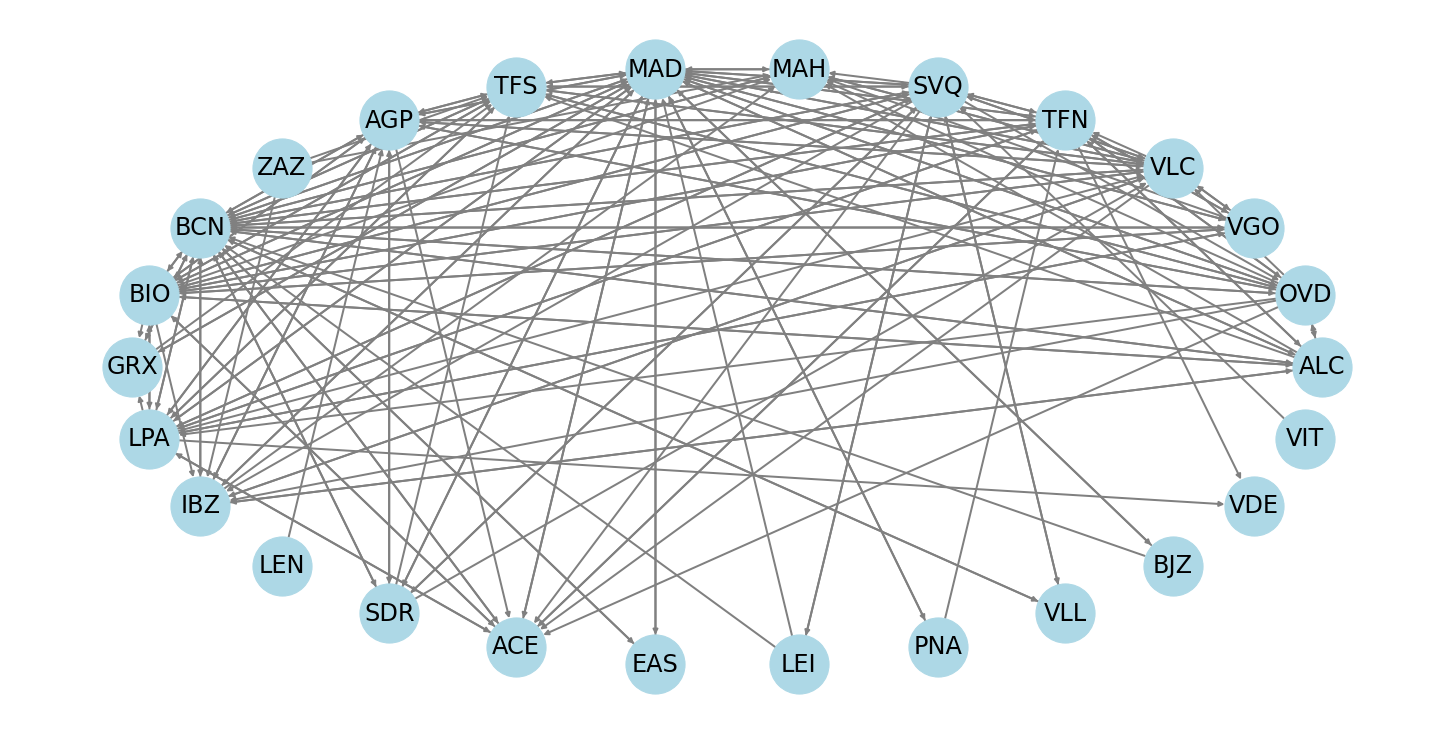

In [88]:
nx.draw_circular(DG,
                node_color = "lightblue",
                edge_color = "gray",
                font_size = 24,
                width = 2,with_labels = True, node_size = 3500,
)
plt.show()

In [89]:
#Ara veurem quins són els camins més curts entre aeroports

## Cerca amb Algorisme de Djikstra

In [90]:
list(nx.all_shortest_paths(DG,source="PNA",target = "VLL", weight =None))

[['PNA', 'TFN', 'BCN', 'VLL'],
 ['PNA', 'MAD', 'BCN', 'VLL'],
 ['PNA', 'TFN', 'SVQ', 'VLL'],
 ['PNA', 'MAD', 'SVQ', 'VLL']]

In [91]:
list(nx.dijkstra_path(DG, source="PNA",target="VLL", weight=None))

['PNA', 'TFN', 'BCN', 'VLL']

In [92]:
#Camí més barat de Pamplona a Valladolid

In [93]:
list(nx.all_shortest_paths(DG,source="PNA",target = "VLL", weight ="price"))

[['PNA', 'MAD', 'IBZ', 'BCN', 'VLL']]

In [94]:
#Camí més curt en duració de Pamplona a Valladolid

In [95]:
list(nx.all_shortest_paths(DG,source="PNA",target = "VLL", weight ="duration"))

[['PNA', 'MAD', 'SVQ', 'VLL']]

## Cerca amb Algorisme A*

In [96]:
list(nx.astar_path(DG, ("PNA"), ("VLL"), weight = "price"))

['PNA', 'MAD', 'IBZ', 'BCN', 'VLL']

In [97]:
#Funció que doni més informació sobre el cost o la duració del camí óptim

In [98]:
def show_path(path):
    total_price = 0
    total_duration = 0
    
    for i in range(len(path)-1):
        origin = path[i]
        destination = path[i+1]
        duration = DG[origin][destination]["duration"]
        price = DG[origin][destination]["price"]
        
        total_price = total_price + price
        total_duration = total_duration + duration
        print("    %s -> %s\n    -Duration: %s Price: %s €" % (
            iata_spain.loc[origin]["name"],
            iata_spain.loc[destination]["name"],
            duration,price)
        )
    print("\n       Total Duration: %s Total price: %s € \n" % (
            total_duration, total_price)
    )
    

In [99]:
#informació del camí més econòmic.

In [100]:
show_path(['PNA', 'MAD', 'IBZ', 'BCN', 'VLL']
)

    Aeropuerto de Pamplona -> Aeropuerto Adolfo Suárez Madrid-Barajas
    -Duration: 60.0 Price: 326 €
    Aeropuerto Adolfo Suárez Madrid-Barajas -> Aeropuerto de Ibiza
    -Duration: 80.0 Price: 45 €
    Aeropuerto de Ibiza -> Aeropuerto de Barcelona-El Prat
    -Duration: 65.0 Price: 6 €
    Aeropuerto de Barcelona-El Prat -> Aeropuerto de Villanubla
    -Duration: 90.0 Price: 94 €

       Total Duration: 295.0 Total price: 471 € 



In [101]:
#Funció que mostri informació de tots els camins

In [102]:
def get_all_shortest_path(DiGraph, origin, destination):
    print("*** All shortest path -Origen: %s Destino: %s" % (
       origin, destination 
    ))
    
    for weight in [None, "duration", "price"]:
        print("* Ordenando por: %s" % weight)
        paths = list(nx.all_shortest_paths(DiGraph, source = origin,
                                         target = destination,
                                         weight = weight))
        
        for path in paths:
            print("   Camino óptimo: %s" % path)
            show_path(path)
        
        

In [103]:
get_all_shortest_path(DG, origin = "PNA", destination = "VLL")

*** All shortest path -Origen: PNA Destino: VLL
* Ordenando por: None
   Camino óptimo: ['PNA', 'TFN', 'BCN', 'VLL']
    Aeropuerto de Pamplona -> Aeropuerto de Tenerife Norte
    -Duration: 185.0 Price: 1226 €
    Aeropuerto de Tenerife Norte -> Aeropuerto de Barcelona-El Prat
    -Duration: 205.0 Price: 185 €
    Aeropuerto de Barcelona-El Prat -> Aeropuerto de Villanubla
    -Duration: 90.0 Price: 94 €

       Total Duration: 480.0 Total price: 1505 € 

   Camino óptimo: ['PNA', 'MAD', 'BCN', 'VLL']
    Aeropuerto de Pamplona -> Aeropuerto Adolfo Suárez Madrid-Barajas
    -Duration: 60.0 Price: 326 €
    Aeropuerto Adolfo Suárez Madrid-Barajas -> Aeropuerto de Barcelona-El Prat
    -Duration: 80.0 Price: 94 €
    Aeropuerto de Barcelona-El Prat -> Aeropuerto de Villanubla
    -Duration: 90.0 Price: 94 €

       Total Duration: 230.0 Total price: 514 € 

   Camino óptimo: ['PNA', 'TFN', 'SVQ', 'VLL']
    Aeropuerto de Pamplona -> Aeropuerto de Tenerife Norte
    -Duration: 185.0 Pric

In [104]:
def get_shortests_path(DiGraph, origin, destination):
    print("*** Origen: %s Destino: %s" % (origin, destination))
    
    for weight in [None, "duration", "price"]:
        print(" Ordenado por: %s" % weight)
        path = list(nx.astar_path(DiGraph,(origin), (destination), 
                                 weight = weight))
        
        print("   Camino óptimo: %s " % path)
        show_path(path)
    

In [105]:
get_shortests_path(DG,"PNA","VLL")

*** Origen: PNA Destino: VLL
 Ordenado por: None
   Camino óptimo: ['PNA', 'TFN', 'BCN', 'VLL'] 
    Aeropuerto de Pamplona -> Aeropuerto de Tenerife Norte
    -Duration: 185.0 Price: 1226 €
    Aeropuerto de Tenerife Norte -> Aeropuerto de Barcelona-El Prat
    -Duration: 205.0 Price: 185 €
    Aeropuerto de Barcelona-El Prat -> Aeropuerto de Villanubla
    -Duration: 90.0 Price: 94 €

       Total Duration: 480.0 Total price: 1505 € 

 Ordenado por: duration
   Camino óptimo: ['PNA', 'MAD', 'SVQ', 'VLL'] 
    Aeropuerto de Pamplona -> Aeropuerto Adolfo Suárez Madrid-Barajas
    -Duration: 60.0 Price: 326 €
    Aeropuerto Adolfo Suárez Madrid-Barajas -> Aeropuerto de Sevilla-San Pablo
    -Duration: 65.0 Price: 761 €
    Aeropuerto de Sevilla-San Pablo -> Aeropuerto de Villanubla
    -Duration: 75.0 Price: 71 €

       Total Duration: 200.0 Total price: 1158 € 

 Ordenado por: price
   Camino óptimo: ['PNA', 'MAD', 'IBZ', 'BCN', 'VLL'] 
    Aeropuerto de Pamplona -> Aeropuerto Adolfo 

In [38]:
#Funció que pinta el camí óptim en el graph

In [106]:
def plot_shortest_path(path):
    print(path)
    
    positions = nx.circular_layout(DG)
    
    nx.draw(DG, pos=positions,
                node_color='lightblue',
                edge_color='gray',
                font_size=24,
                width=1, with_labels=True, node_size=3500, alpha=0.8
           )
    
    short_path=nx.DiGraph()
    for i in range(len(path)-1):
        short_path.add_edge(path[i], path[i+1])
    
    nx.draw(short_path, pos=positions,
                node_color='dodgerblue',
                edge_color='dodgerblue',
                font_size=24,
                width=3, with_labels=True, node_size=3000
           )
    plt.show()

['PNA', 'MAD', 'IBZ', 'BCN', 'VLL']


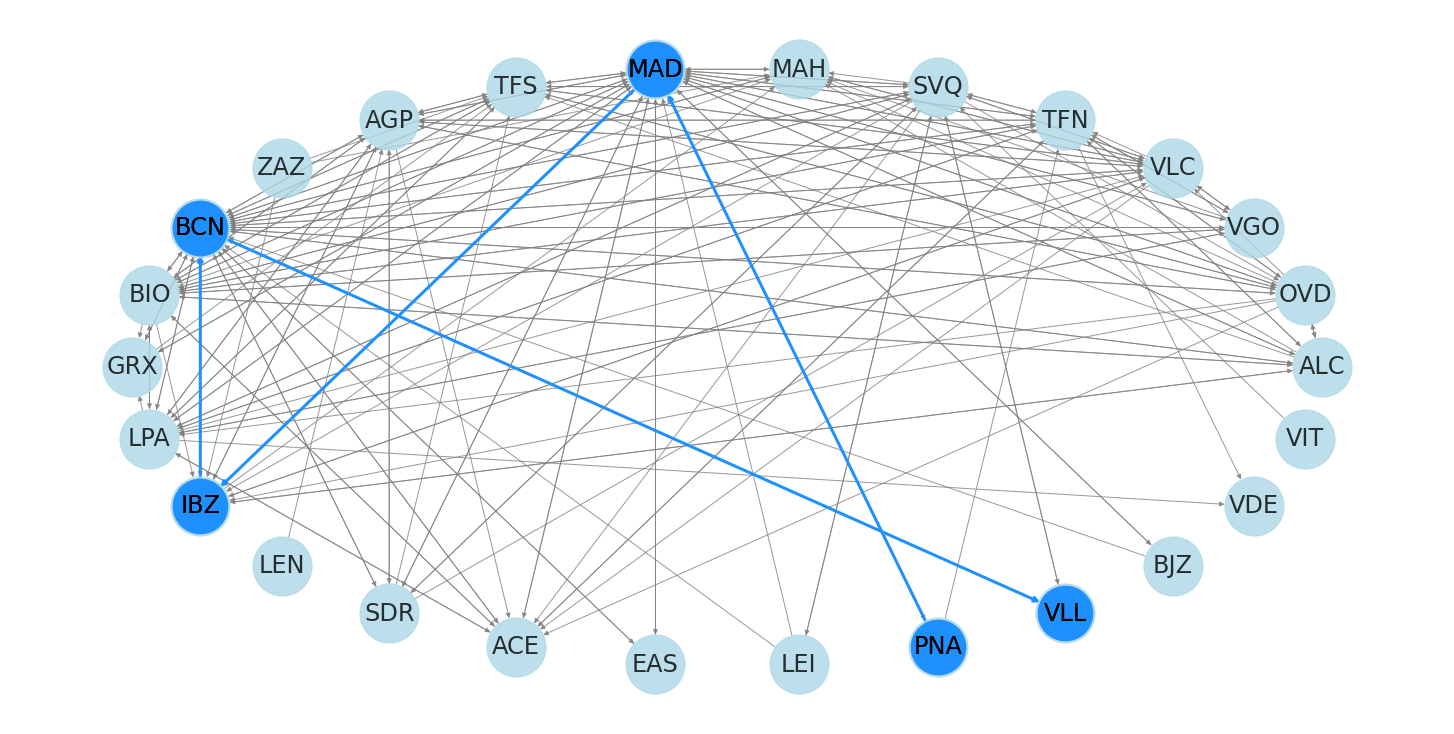

In [107]:
path = ['PNA', 'MAD', 'IBZ', 'BCN', 'VLL']
plot_shortest_path(path)

In [108]:
def get_shortest_path(DiGraph, origin, destination):
    print("*** Origen: %s Destino: %s" % (origin, destination))
    
    for weight in [None, "duration", "price"]:
        print(" Ordenado por: %s" % weight)
        path = list(nx.astar_path(DiGraph,
                                  (origin),
                                  (destination),
                                  weight=weight
                                 ))
        print("   Camino óptimo: %s " % path)
        show_path(path)
        plot_shortest_path(path)


*** Origen: PNA Destino: VLL
 Ordenado por: None
   Camino óptimo: ['PNA', 'TFN', 'BCN', 'VLL'] 
    Aeropuerto de Pamplona -> Aeropuerto de Tenerife Norte
    -Duration: 185.0 Price: 1226 €
    Aeropuerto de Tenerife Norte -> Aeropuerto de Barcelona-El Prat
    -Duration: 205.0 Price: 185 €
    Aeropuerto de Barcelona-El Prat -> Aeropuerto de Villanubla
    -Duration: 90.0 Price: 94 €

       Total Duration: 480.0 Total price: 1505 € 

['PNA', 'TFN', 'BCN', 'VLL']


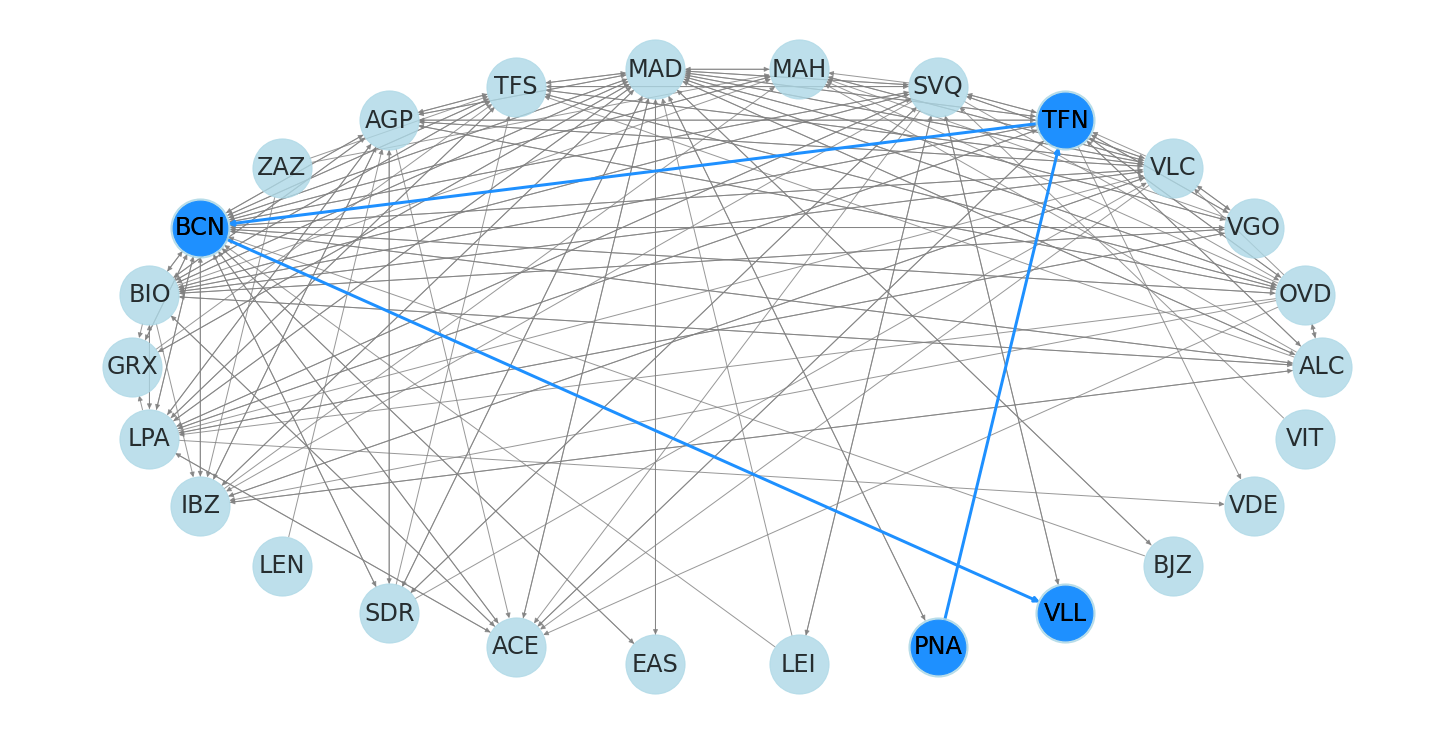

 Ordenado por: duration
   Camino óptimo: ['PNA', 'MAD', 'SVQ', 'VLL'] 
    Aeropuerto de Pamplona -> Aeropuerto Adolfo Suárez Madrid-Barajas
    -Duration: 60.0 Price: 326 €
    Aeropuerto Adolfo Suárez Madrid-Barajas -> Aeropuerto de Sevilla-San Pablo
    -Duration: 65.0 Price: 761 €
    Aeropuerto de Sevilla-San Pablo -> Aeropuerto de Villanubla
    -Duration: 75.0 Price: 71 €

       Total Duration: 200.0 Total price: 1158 € 

['PNA', 'MAD', 'SVQ', 'VLL']


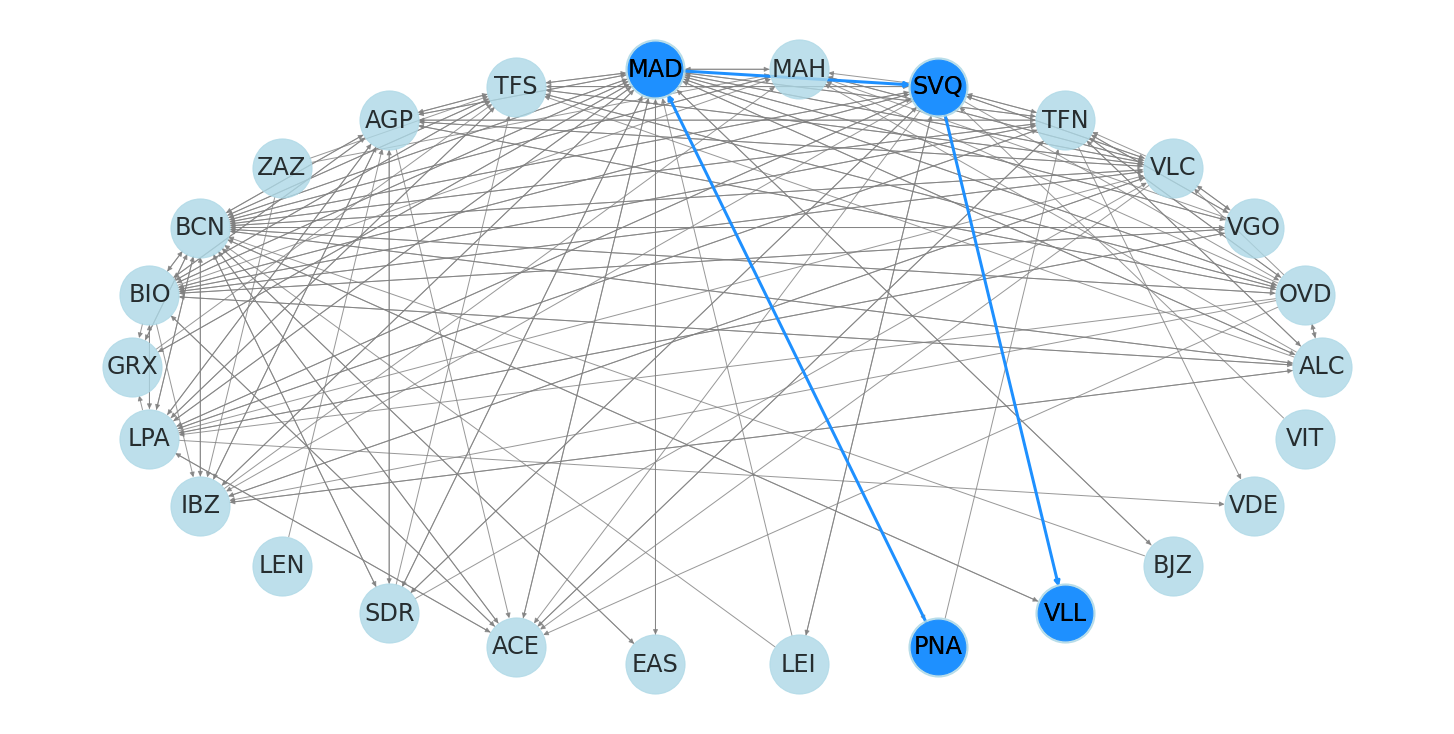

 Ordenado por: price
   Camino óptimo: ['PNA', 'MAD', 'IBZ', 'BCN', 'VLL'] 
    Aeropuerto de Pamplona -> Aeropuerto Adolfo Suárez Madrid-Barajas
    -Duration: 60.0 Price: 326 €
    Aeropuerto Adolfo Suárez Madrid-Barajas -> Aeropuerto de Ibiza
    -Duration: 80.0 Price: 45 €
    Aeropuerto de Ibiza -> Aeropuerto de Barcelona-El Prat
    -Duration: 65.0 Price: 6 €
    Aeropuerto de Barcelona-El Prat -> Aeropuerto de Villanubla
    -Duration: 90.0 Price: 94 €

       Total Duration: 295.0 Total price: 471 € 

['PNA', 'MAD', 'IBZ', 'BCN', 'VLL']


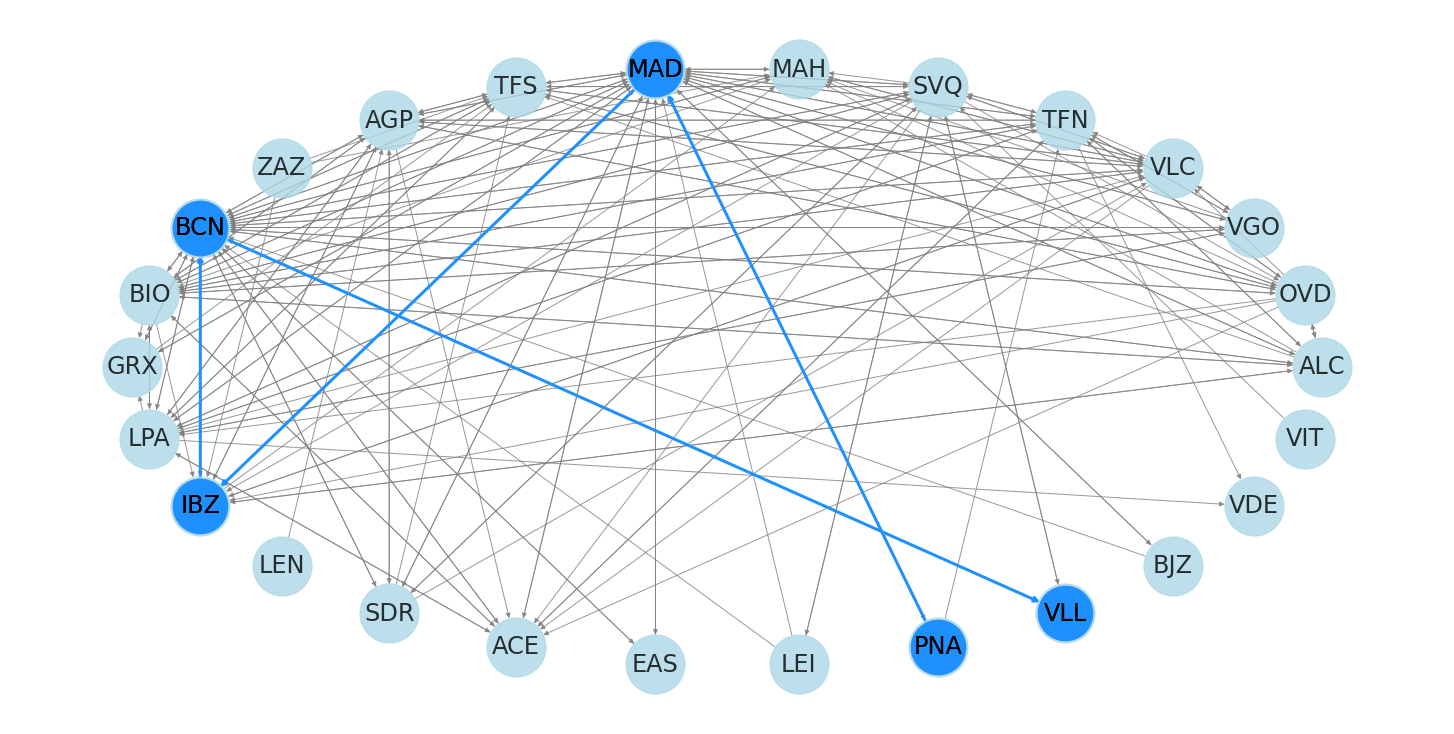

In [109]:
get_shortest_path(DG, origin="PNA", destination="VLL")
